In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\susha\Downloads\customer_churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()  #handling null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# A) Data Manipulation:

In [6]:
sum(df['gender'] == "Male")


3555

In [7]:
sum(df['InternetService'] == "DSL")

2421

In [8]:
new_customer = df[(df['gender'] == 'Female') & 
(df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')] 

new_customer.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139  0390-DCFDQ  Female              1     Yes         No       1   
176  2656-FMOKZ  Female              1      No         No      15   
267  3197-ARFOY  Female              1      No         No      19   
451  5760-WRAHC  Female              1      No         No      22   
470  4933-IKULF  Female              1      No         No      17   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
139          Yes            No     Fiber optic                   No  ...   
176          Yes           Yes     Fiber optic                   No  ...   
267          Yes            No     Fiber optic                  Yes  ...   
451          Yes            No             DSL                  Yes  ...   
470          Yes            No              No  No internet service  ...   

        DeviceProtection          TechSupport          StreamingTV  \
139                   No                   No                   No   
176                   No                   No                   No   
267                   No                  Yes                  Yes   
451                  Yes                  Yes                   No   
470  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling PaymentMethod  \
139                   No  Month-to-month              Yes  Mailed check   
176                   No  Month-to-month              Yes  Mailed check   
267                  Yes  Month-to-month              Yes  Mailed check   
451                  Yes  Month-to-month              Yes  Mailed check   
470  No internet service        One year               No  Mailed check   

    MonthlyCharges  TotalCharges Churn  
139          70.45         70.45   Yes  
176          74.45        1145.7   Yes  
267         105.00       2007.25    No  
451          69.75        1545.4    No  
470          20.65         330.6    No  

[5 rows x 21 columns]

In [11]:
df['tenure'] = pd.to_numeric(df['tenure'],errors = 'coerce')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [12]:
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
new_customer.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
2  3668-QPYBK    Male              0      No         No       2          Yes   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
2                No             DSL            Yes  ...               No   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
2          No          No              No  Month-to-month              Yes   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
2      Mailed check          53.85        108.15    Yes  
4  Electronic check          70.70        151.65    Yes  
5  Electronic check          99.65        820.50    Yes  
7      Mailed check          29.75        301.90     No  

[5 rows x 21 columns]

# B) Data Visualization:

In [34]:
churn_counts = df['Churn'].value_counts()

# Prepare data for pie chart
sizes = churn_counts.values
labels = churn_counts.index



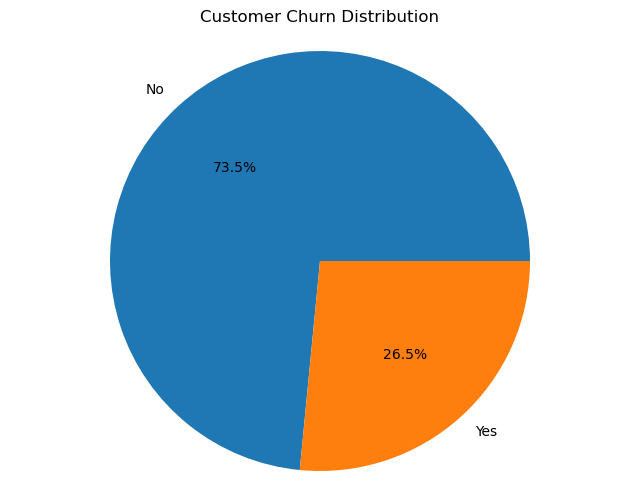

In [38]:
# Create pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%") #startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Customer Churn Distribution')
plt.show()

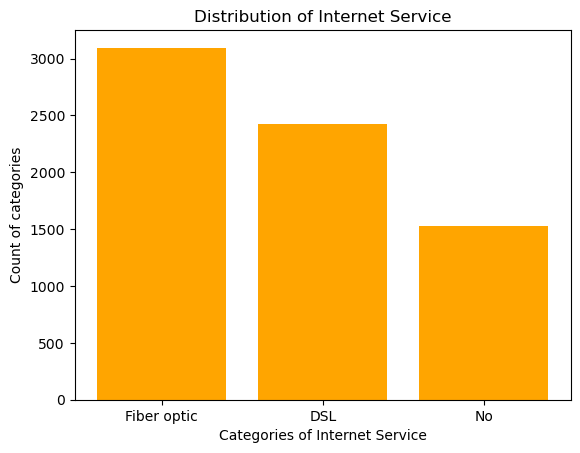

In [41]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')

plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service') 
plt.show() 

In [51]:
df.drop('customerID',axis='columns',inplace=True)

In [53]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [54]:
df.gender.unique()

array([1, 0], dtype=int64)

# One hot encoding for categorical columns

In [55]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [56]:
df.sample(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7          1              0      No         No      10           No   
2196       1              0     Yes        Yes      19          Yes   
3820       0              1     Yes         No      72          Yes   
1189       0              0      No         No       3          Yes   
3313       0              0      No         No       1          Yes   

         MultipleLines       OnlineSecurity         OnlineBackup  \
7     No phone service                  Yes                   No   
2196                No  No internet service  No internet service   
3820               Yes                  Yes                  Yes   
1189                No                   No                   No   
3313                No  No internet service  No internet service   

         DeviceProtection  ... InternetService_DSL  \
7                      No  ...                True   
2196  No internet service  ...               False   
3820                  Yes  ...               False   
1189                  Yes  ...               False   
3313  No internet service  ...               False   

     InternetService_Fiber optic InternetService_No Contract_Month-to-month  \
7                          False              False                    True   
2196                       False               True                    True   
3820                        True              False                    True   
1189                        True              False                    True   
3313                       False               True                    True   

      Contract_One year  Contract_Two year  \
7                 False              False   
2196              False              False   
3820              False              False   
1189              False              False   
3313              False              False   

     PaymentMethod_Bank transfer (automatic)  \
7                                      False   
2196                                   False   
3820                                   False   
1189                                   False   
3313                                   False   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
7                                     False                           False   
2196                                  False                           False   
3820                                   True                           False   
1189                                   True                           False   
3313                                  False                            True   

      PaymentMethod_Mailed check  
7                           True  
2196                        True  
3820                       False  
1189                       False  
3313                       False  

[5 rows x 27 columns]

In [58]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [60]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [61]:
df[df.Churn=='No']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0          1              0     Yes         No       1           No   
1          0              0      No         No      34          Yes   
3          0              0      No         No      45           No   
6          0              0      No        Yes      22          Yes   
7          1              0      No         No      10           No   
...      ...            ...     ...        ...     ...          ...   
7037       1              0      No         No      72          Yes   
7038       0              0     Yes        Yes      24          Yes   
7039       1              0     Yes        Yes      72          Yes   
7040       1              0     Yes        Yes      11           No   
7042       0              0      No         No      66          Yes   

         MultipleLines       OnlineSecurity         OnlineBackup  \
0     No phone service                   No                  Yes   
1                   No                  Yes                   No   
3     No phone service                  Yes                   No   
6                  Yes                   No                  Yes   
7     No phone service                  Yes                   No   
...                ...                  ...                  ...   
7037                No  No internet service  No internet service   
7038               Yes                  Yes                   No   
7039               Yes                   No                  Yes   
7040  No phone service                  Yes                   No   
7042                No                  Yes                   No   

         DeviceProtection  ... InternetService_DSL  \
0                      No  ...                True   
1                     Yes  ...                True   
3                     Yes  ...                True   
6                      No  ...               False   
7                      No  ...                True   
...                   ...  ...                 ...   
7037  No internet service  ...               False   
7038                  Yes  ...                True   
7039                  Yes  ...               False   
7040                   No  ...                True   
7042                  Yes  ...               False   

     InternetService_Fiber optic InternetService_No Contract_Month-to-month  \
0                          False              False                    True   
1                          False              False                   False   
3                          False              False                   False   
6                           True              False                    True   
7                          False              False                    True   
...                          ...                ...                     ...   
7037                       False               True                   False   
7038                       False              False                   False   
7039                        True              False                   False   
7040                       False              False                    True   
7042                        True              False                   False   

      Contract_One year  Contract_Two year  \
0                 False              False   
1                  True              False   
3                  True              False   
6                 False              False   
7                 False              False   
...                 ...                ...   
7037              False               True   
7038               True              False   
7039               True              False   
7040              False              False   
7042              False               True   

     PaymentMethod_Bank transfer (automatic)  \
0                                      False   
1                                      False   
3                                       T

# Data Visualization

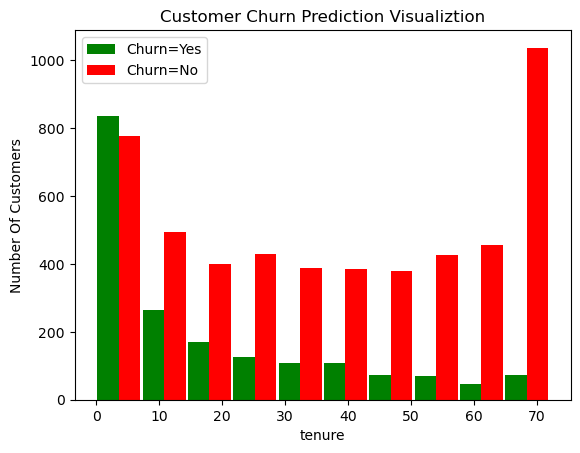

In [66]:

tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

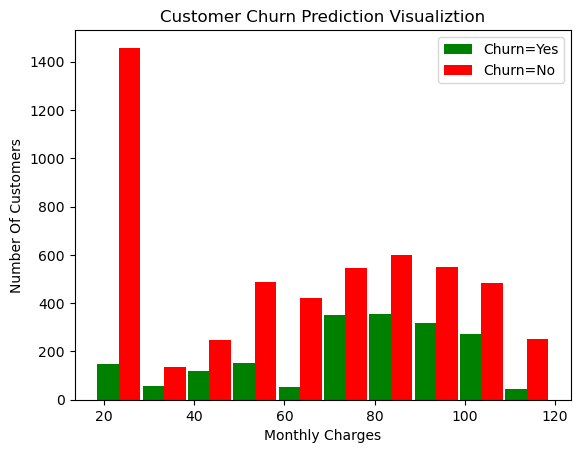

In [67]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [69]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [70]:
print_unique_col_values(df)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [74]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='bool':
                print(f'{column}: {df[column].unique()}') 

In [75]:
print_unique_col_values(df)

InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
Contract_Month-to-month: [ True False]
Contract_One year: [False  True]
Contract_Two year: [False  True]
PaymentMethod_Bank transfer (automatic): [False  True]
PaymentMethod_Credit card (automatic): [False  True]
PaymentMethod_Electronic check: [ True False]
PaymentMethod_Mailed check: [False  True]


# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [72]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)


In [73]:
print_unique_col_values(df)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


# Convert Yes and No to 1 or 0

In [84]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','InternetService_DSL',
                 'InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year',
                 'Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
                  'PaymentMethod_Electronic check','PaymentMethod_Mailed check']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0}, inplace=True)
    df[col].replace({'True' : 1, 'False' : 0}, inplace = True)

In [85]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
Contract_Month-to-month: [ True False]
Contract_One year: [False  True]
Contract_Two year: [False  True]
PaymentMethod_Bank transfer (automatic): [False  True]
PaymentMethod_Credit card (automatic): [False  True]
PaymentMethod_Electronic check: [ True False

In [79]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [80]:
df.gender.unique()

array([1, 0], dtype=int64)

# One hot encoding for categorical columns

In [89]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in df.columns :
      if df[i].dtypes =='object': 
        df[i] = ss.fit_transform(df[i])
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    True                        False               False   
1                    True                        False               False   
2                    True                        False               False   
3                    True                        False               False   
4                   False                         True               False   
...                   ...                          ...                 ...   
7038                 True                        False               False   
7039                False                         True               False   
7040                 True                        False               False   
7041                False                         True               False   
7042                False                         True               False   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        True              False              False   
1                       False               True              False   
2                        True              False              False   
3                       False               True              False   
4                        True              False              False   
...                       ...                ...                ...   
7038                    False               True              False   
7039                    False               True              False   
7040                     True              False              False   
7041                     True              False              False   
7042                    False              False               True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7038                                    False   
7039                  

In [91]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in df.columns :
      if df[i].dtypes =='bool': 
        df[i] = ss.fit_transform(df[[i]])
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                1.381712                    -0.885660           -0.525927   
1                1.381712                    -0.885660           -0.525927   
2                1.381712                    -0.885660           -0.525927   
3                1.381712                    -0.885660           -0.525927   
4               -0.723740                     1.129102           -0.525927   
...                   ...                          ...                 ...   
7038             1.381712                    -0.885660           -0.525927   
7039            -0.723740                     1.129102           -0.525927   
7040             1.381712                    -0.885660           -0.525927   
7041            -0.723740                     1.129102           -0.525927   
7042            -0.723740                     1.129102           -0.525927   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                    0.904184          -0.514249          -0.562975   
1                   -1.105970           1.944582          -0.562975   
2                    0.904184          -0.514249          -0.562975   
3                   -1.105970           1.944582          -0.562975   
4                    0.904184          -0.514249          -0.562975   
...                       ...                ...                ...   
7038                -1.105970           1.944582          -0.562975   
7039                -1.105970           1.944582          -0.562975   
7040                 0.904184          -0.514249          -0.562975   
7041                 0.904184          -0.514249          -0.562975   
7042                -1.105970          -0.514249           1.776278   

      PaymentMethod_Bank transfer (automatic)  \
0                                   -0.529885   
1                                   -0.529885   
2                                   -0.529885   
3                                    1.887201   
4                                   -0.529885   
...                                       ...   
7038                                -0.529885   
7039                  

# C) Model Building: 

In [93]:
x = df[['tenure']] 
y = df[['Churn']]

In [94]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930, 1)
(4930, 1)
(2113, 1)
(2113, 1)


In [96]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(12,input_dim = 1, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [116]:
history = model.fit(x_train,y_train,epochs = 150, validation_data = (x_test,y_test))
print(history.history.keys())

Epoch 1/150
155/155 [==============================] - 1s 7ms/step - loss: 0.5102 - accuracy: 0.7373 - val_loss: 0.5094 - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5098 - accuracy: 0.7373 - val_loss: 0.5094 - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5103 - accuracy: 0.7373 - val_loss: 0.5092 - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5098 - accuracy: 0.7373 - val_loss: 0.5096 - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5105 - accuracy: 0.7373 - val_loss: 0.5093 - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5101 - accuracy: 0.7373 - val_loss: 0.5091 - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5102 - accuracy: 0.7373 - val_loss: 0.5092 - val_accuracy: 0.7283

Epoch 58/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5080 - accuracy: 0.7578 - val_loss: 0.5079 - val_accuracy: 0.7563
Epoch 59/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5083 - accuracy: 0.7568 - val_loss: 0.5080 - val_accuracy: 0.7563
Epoch 60/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5080 - accuracy: 0.7568 - val_loss: 0.5079 - val_accuracy: 0.7563
Epoch 61/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5081 - accuracy: 0.7568 - val_loss: 0.5080 - val_accuracy: 0.7563
Epoch 62/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5086 - accuracy: 0.7568 - val_loss: 0.5086 - val_accuracy: 0.7563
Epoch 63/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5081 - accuracy: 0.7568 - val_loss: 0.5085 - val_accuracy: 0.7563
Epoch 64/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5086 - accuracy: 0.7568 - val_loss: 0.5095 - val_accuracy:

Epoch 115/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5065 - accuracy: 0.7560 - val_loss: 0.5078 - val_accuracy: 0.7525
Epoch 116/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5072 - accuracy: 0.7560 - val_loss: 0.5071 - val_accuracy: 0.7525
Epoch 117/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5075 - accuracy: 0.7560 - val_loss: 0.5073 - val_accuracy: 0.7525
Epoch 118/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5067 - accuracy: 0.7560 - val_loss: 0.5076 - val_accuracy: 0.7525
Epoch 119/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5063 - accuracy: 0.7560 - val_loss: 0.5068 - val_accuracy: 0.7525
Epoch 120/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5066 - accuracy: 0.7560 - val_loss: 0.5070 - val_accuracy: 0.7525
Epoch 121/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5065 - accuracy: 0.7560 - val_loss: 0.5071 - val_ac

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                24        
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
y_pred = model.predict(x_test) 

67/67 [==============================] - 0s 3ms/step


In [123]:
import numpy as np

# Assuming y_pred contains probabilities
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [124]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

cr  = classification_report(y_test, y_pred_binary)
print(cr)


[[1395  144]
 [ 379  195]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1539
           1       0.58      0.34      0.43       574

    accuracy                           0.75      2113
   macro avg       0.68      0.62      0.63      2113
weighted avg       0.73      0.75      0.73      2113



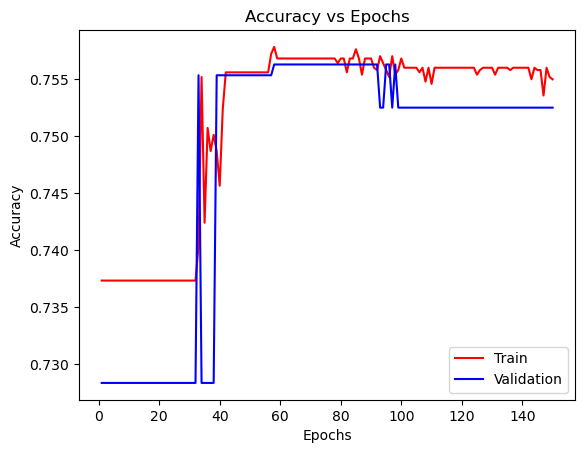

In [131]:

import matplotlib.pyplot as plt 

# Assuming 'history' is your training history object
epochs = range(1, len(history.history['accuracy']) + 1)  # Create an array for epoch numbers

# Plotting accuracy
plt.plot(epochs, history.history['accuracy'], color='Red', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='Blue', label='Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

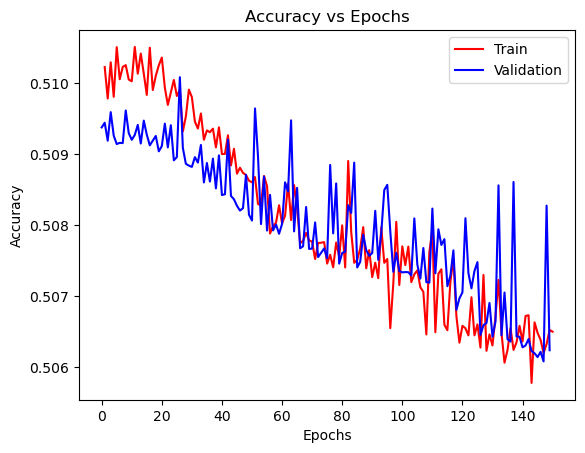

In [132]:
import matplotlib.pyplot as plt

# Assuming 'history' is your training history object
epochs = range(1, len(history.history['loss']) + 1)  # Create an array for epoch numbers

# Plotting accuracy
plt.plot(epochs, history.history['loss'], color = 'Red', label = 'Train') 
plt.plot(history.history['val_loss'], color = 'Blue', label = 'Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# b. Build the 2nd model using same target and feature variables:

In [134]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(12,input_dim = 1, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [135]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [143]:
history= model.fit(x_train,y_train,epochs = 150, validation_data = (x_test,y_test))
print(history.history.keys())

Epoch 1/150
155/155 [==============================] - 1s 7ms/step - loss: 0.5208 - accuracy: 0.7373 - val_loss: 0.5220 - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5208 - accuracy: 0.7373 - val_loss: 0.5214 - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5186 - accuracy: 0.7373 - val_loss: 0.5183 - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5208 - accuracy: 0.7373 - val_loss: 0.5239 - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5203 - accuracy: 0.7373 - val_loss: 0.5181 - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5210 - accuracy: 0.7373 - val_loss: 0.5169 - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5204 - accuracy: 0.7373 - val_loss: 0.5231 - val_accuracy: 0.7283

Epoch 58/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5163 - accuracy: 0.7373 - val_loss: 0.5190 - val_accuracy: 0.7283
Epoch 59/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5176 - accuracy: 0.7373 - val_loss: 0.5168 - val_accuracy: 0.7283
Epoch 60/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5222 - accuracy: 0.7373 - val_loss: 0.5158 - val_accuracy: 0.7283
Epoch 61/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5225 - accuracy: 0.7373 - val_loss: 0.5208 - val_accuracy: 0.7283
Epoch 62/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5217 - accuracy: 0.7373 - val_loss: 0.5184 - val_accuracy: 0.7283
Epoch 63/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5205 - accuracy: 0.7373 - val_loss: 0.5159 - val_accuracy: 0.7283
Epoch 64/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5194 - accuracy: 0.7373 - val_loss: 0.5162 - val_accuracy:

Epoch 115/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5192 - accuracy: 0.7373 - val_loss: 0.5159 - val_accuracy: 0.7283
Epoch 116/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5194 - accuracy: 0.7373 - val_loss: 0.5188 - val_accuracy: 0.7283
Epoch 117/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5207 - accuracy: 0.7373 - val_loss: 0.5195 - val_accuracy: 0.7283
Epoch 118/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5213 - accuracy: 0.7373 - val_loss: 0.5198 - val_accuracy: 0.7283
Epoch 119/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5195 - accuracy: 0.7373 - val_loss: 0.5185 - val_accuracy: 0.7283
Epoch 120/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5239 - accuracy: 0.7373 - val_loss: 0.5246 - val_accuracy: 0.7283
Epoch 121/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5196 - accuracy: 0.7373 - val_loss: 0.5205 - val_ac

AttributeError: 'History' object has no attribute 'history1'

In [138]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                24        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
y_pred1 = model.predict(x_test) 

67/67 [==============================] - 1s 3ms/step


In [140]:
import numpy as np

# Assuming y_pred contains probabilities
y_pred_binary1 = np.where(y_pred > 0.5, 1, 0)

In [141]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred_binary1)
print(cm)

cr  = classification_report(y_test, y_pred_binary1)
print(cr)


[[1395  144]
 [ 379  195]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1539
           1       0.58      0.34      0.43       574

    accuracy                           0.75      2113
   macro avg       0.68      0.62      0.63      2113
weighted avg       0.73      0.75      0.73      2113



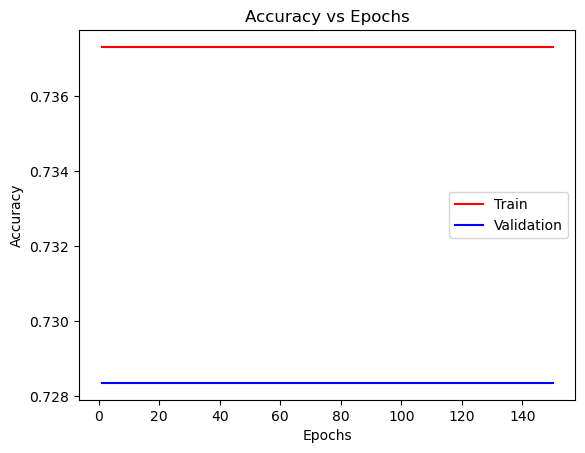

In [142]:
import matplotlib.pyplot as plt 

# Assuming 'history' is your training history object
epochs = range(1, len(history.history['accuracy']) + 1)  # Create an array for epoch numbers

# Plotting accuracy
plt.plot(epochs, history.history['accuracy'], color='Red', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='Blue', label='Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

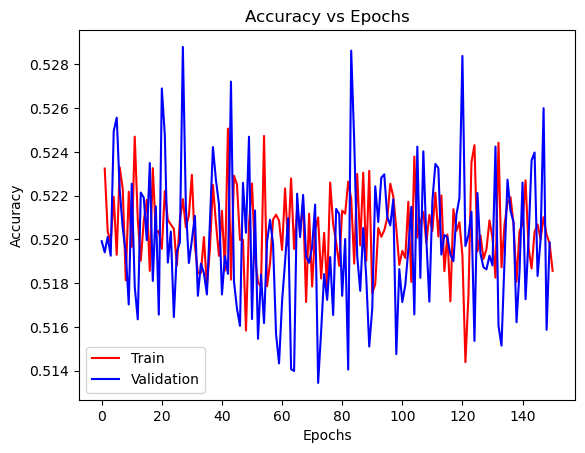

In [144]:
import matplotlib.pyplot as plt

# Assuming 'history' is your training history object
epochs = range(1, len(history.history['loss']) + 1)  # Create an array for epoch numbers

# Plotting accuracy
plt.plot(epochs, history.history['loss'], color = 'Red', label = 'Train') 
plt.plot(history.history['val_loss'], color = 'Blue', label = 'Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and

In [146]:
X = df[['tenure','MonthlyCharges','TotalCharges']] 
Y = df[['Churn']]

In [149]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [150]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4930, 3)
(4930, 1)
(2113, 3)
(2113, 1)


In [155]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(12,input_dim = 3, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [156]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [157]:
history= model.fit(X_train,Y_train,epochs = 150, validation_data = (X_test,Y_test))
print(history.history.keys())

Epoch 1/150
155/155 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 8/150
155/155 [====================

155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 61/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 62/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 63/150
155/155 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 64/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 65/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 66/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 67/150
155/155 [=========================

155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 120/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 121/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 122/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 123/150
155/155 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 124/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 125/150
155/155 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373 - val_loss: nan - val_accuracy: 0.7283
Epoch 126/150
155/155 [==================

In [158]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                48        
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
y_pred2 = model.predict(X_test) 

67/67 [==============================] - 0s 2ms/step


In [168]:
import numpy as np

# Assuming y_pred contains probabilities
y_pred_binary2 = np.where(y_pred2 > 0.5, 1, 0)

In [170]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred_binary2)
print(cm)

cr  = classification_report(y_test, y_pred_binary2)
print(cr)


[[1539    0]
 [ 574    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



C:\Users\susha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\susha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\susha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean of the accuracy is 73%

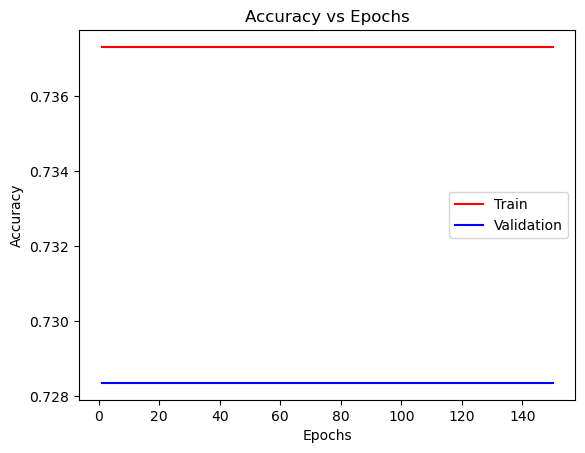

In [163]:
import matplotlib.pyplot as plt 

# Assuming 'history' is your training history object
epochs = range(1, len(history.history['accuracy']) + 1)  # Create an array for epoch numbers

# Plotting accuracy
plt.plot(epochs, history.history['accuracy'], color='Red', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='Blue', label='Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()